2025-07-16 11:40:59 INFO     xscen.config    Updated the config with ../paths_obs.yml.
2025-07-16 11:40:59 INFO     xscen.config    Updated the config with ../config_obs.yml.


Processing variable: tg_mean_annual_rmse

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.


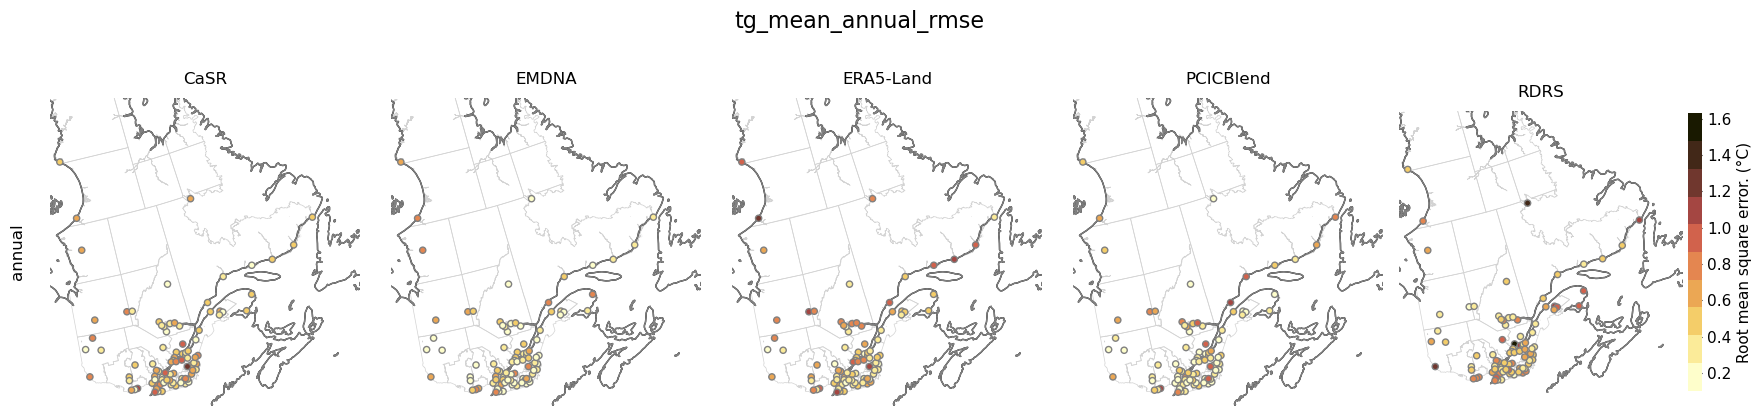

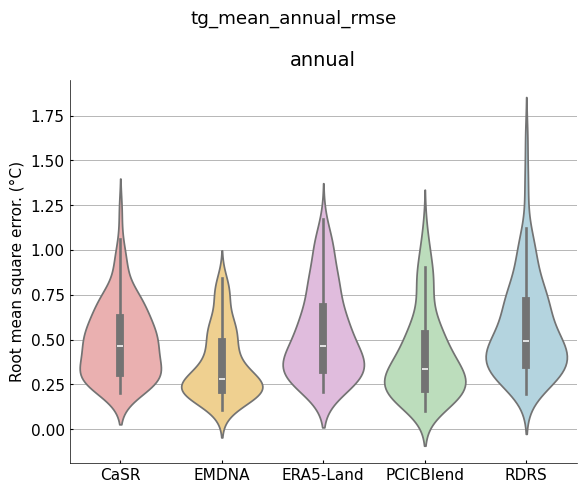

Processing variable: pr_mean_annual_rmse

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.


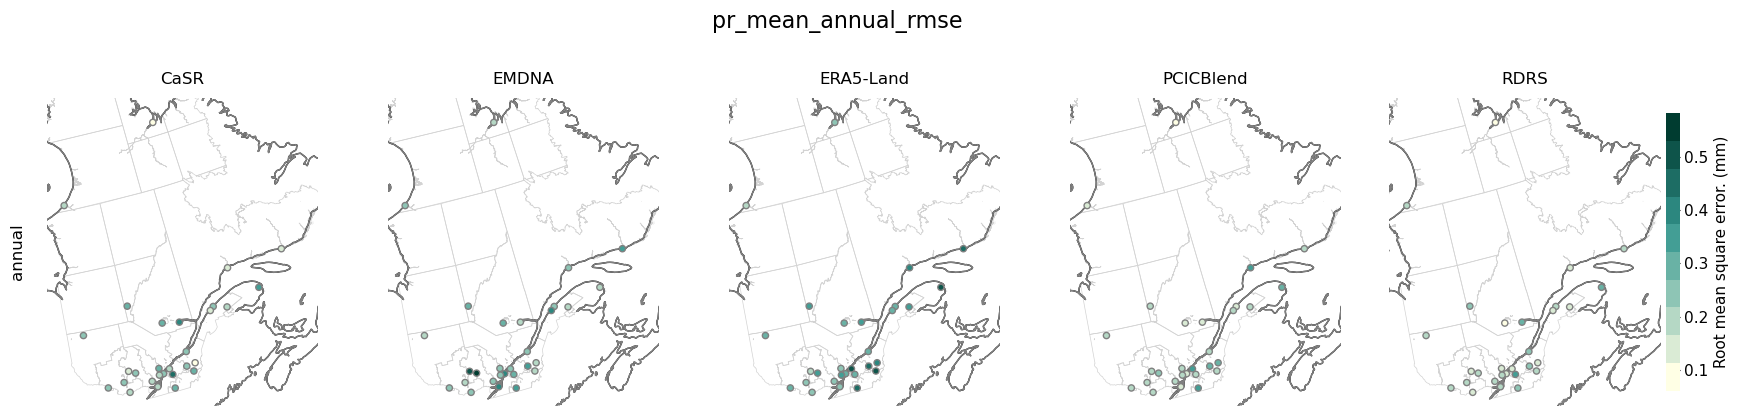

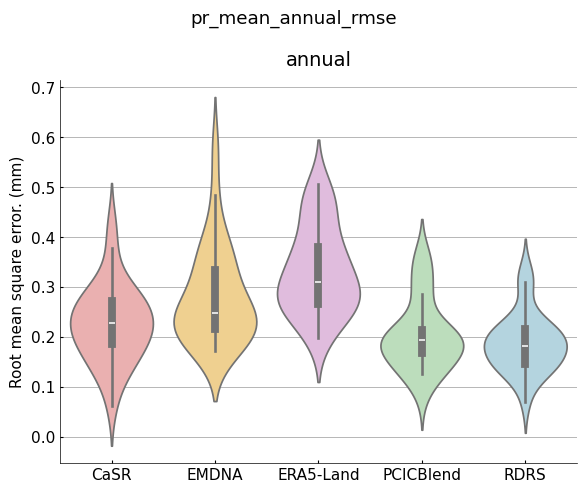

Processing variable: pr_mean_seasonal_rmse

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not


 Station(s) only NaN in DJF for 'CaSR_Quebec_GovCan_AHCCD_CAN_station-pr.Quebec.performance.fx': ['7012071']

 Station(s) only NaN in DJF for 'EMDNA_Quebec_GovCan_AHCCD_CAN_station-pr.Quebec.performance.fx': ['7012071']

 Station(s) only NaN in DJF for 'ERA5-Land_Quebec_GovCan_AHCCD_CAN_station-pr.Quebec.performance.fx': ['7012071']

 Station(s) only NaN in DJF for 'PCICBlend_Quebec_GovCan_AHCCD_CAN_station-pr.Quebec.performance.fx': ['7012071']


/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.



 Station(s) only NaN in DJF for 'RDRS_Quebec_GovCan_AHCCD_CAN_station-pr.Quebec.performance.fx': ['7012071']


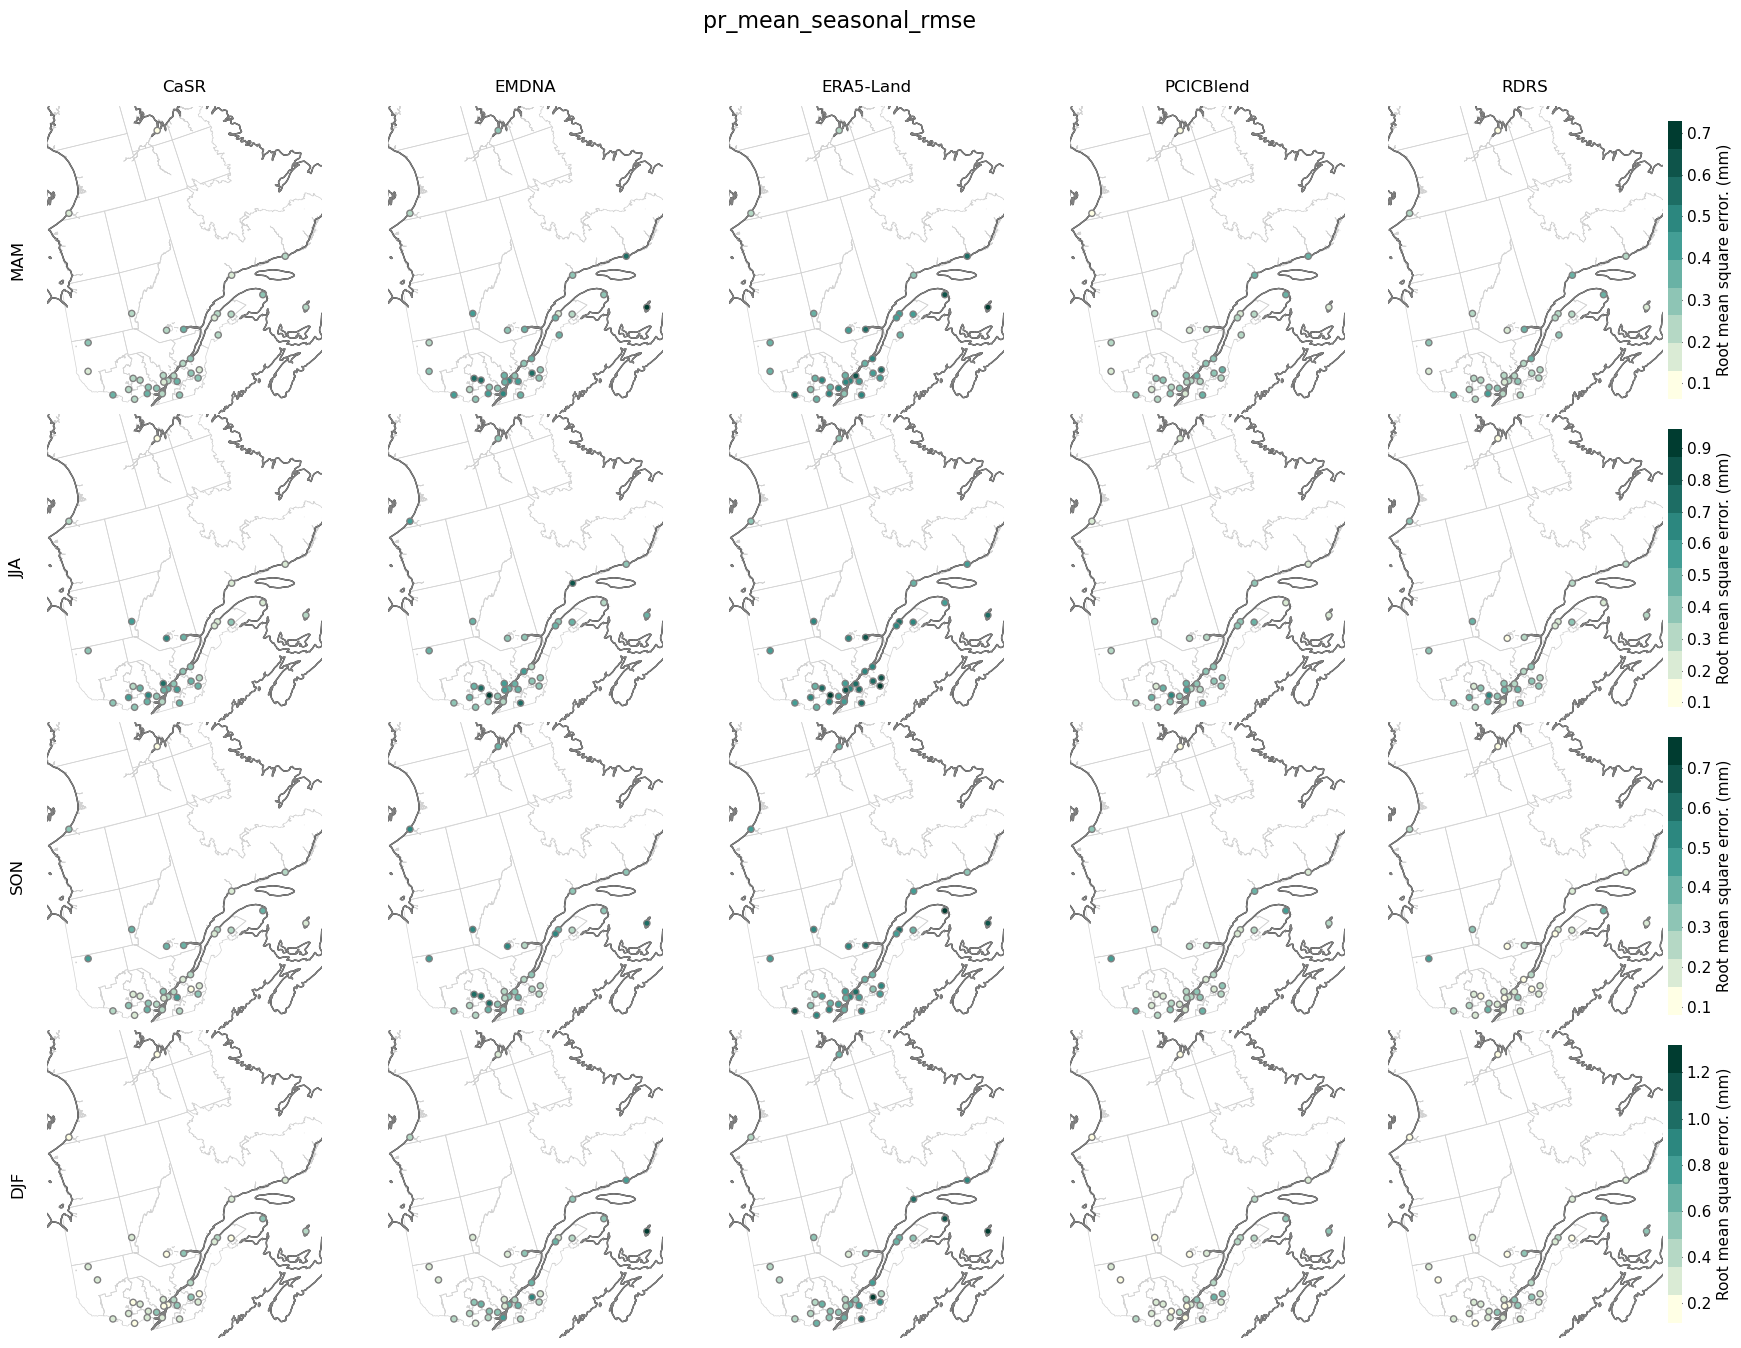

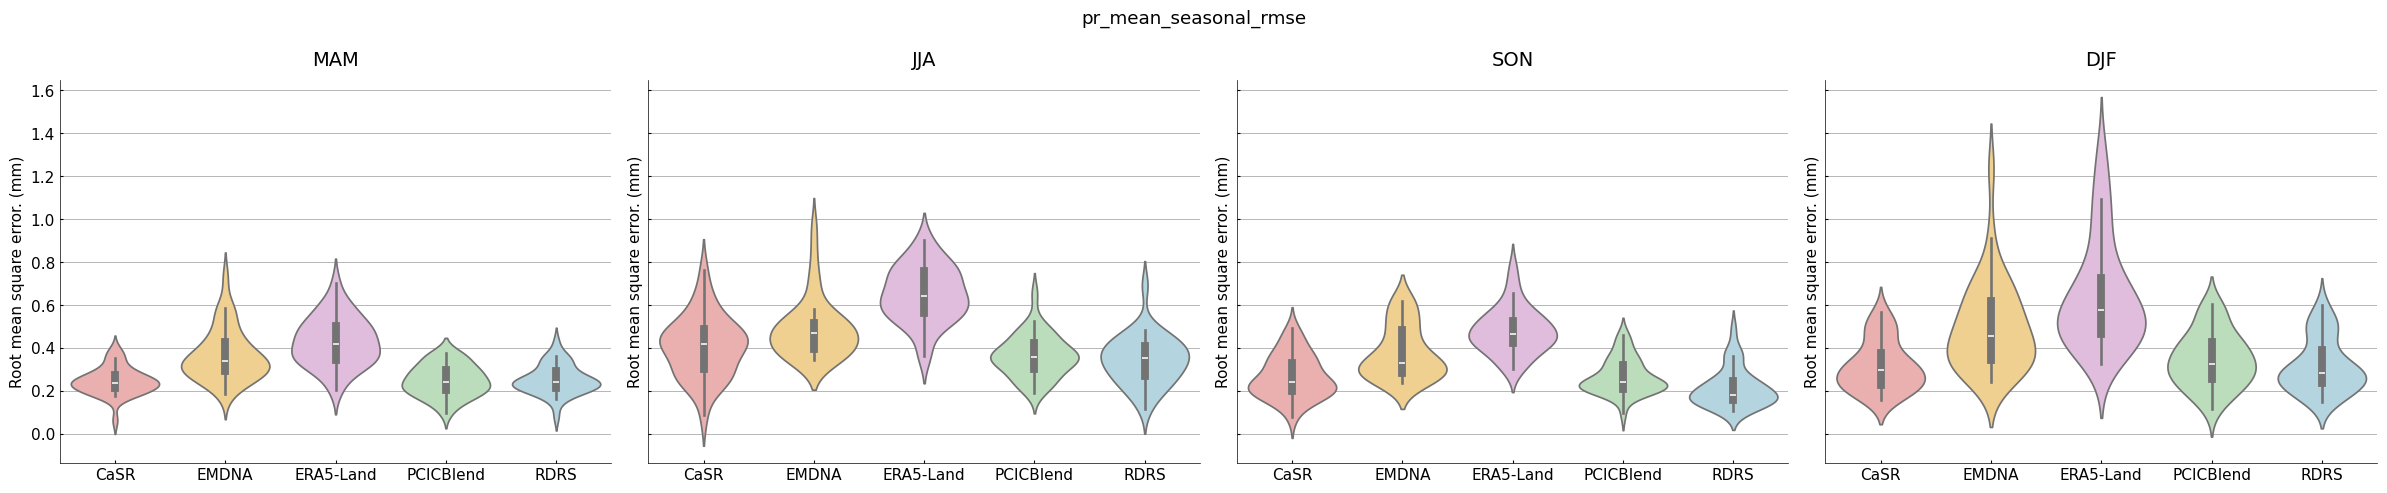

Processing variable: tg_mean_seasonal_rmse

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not

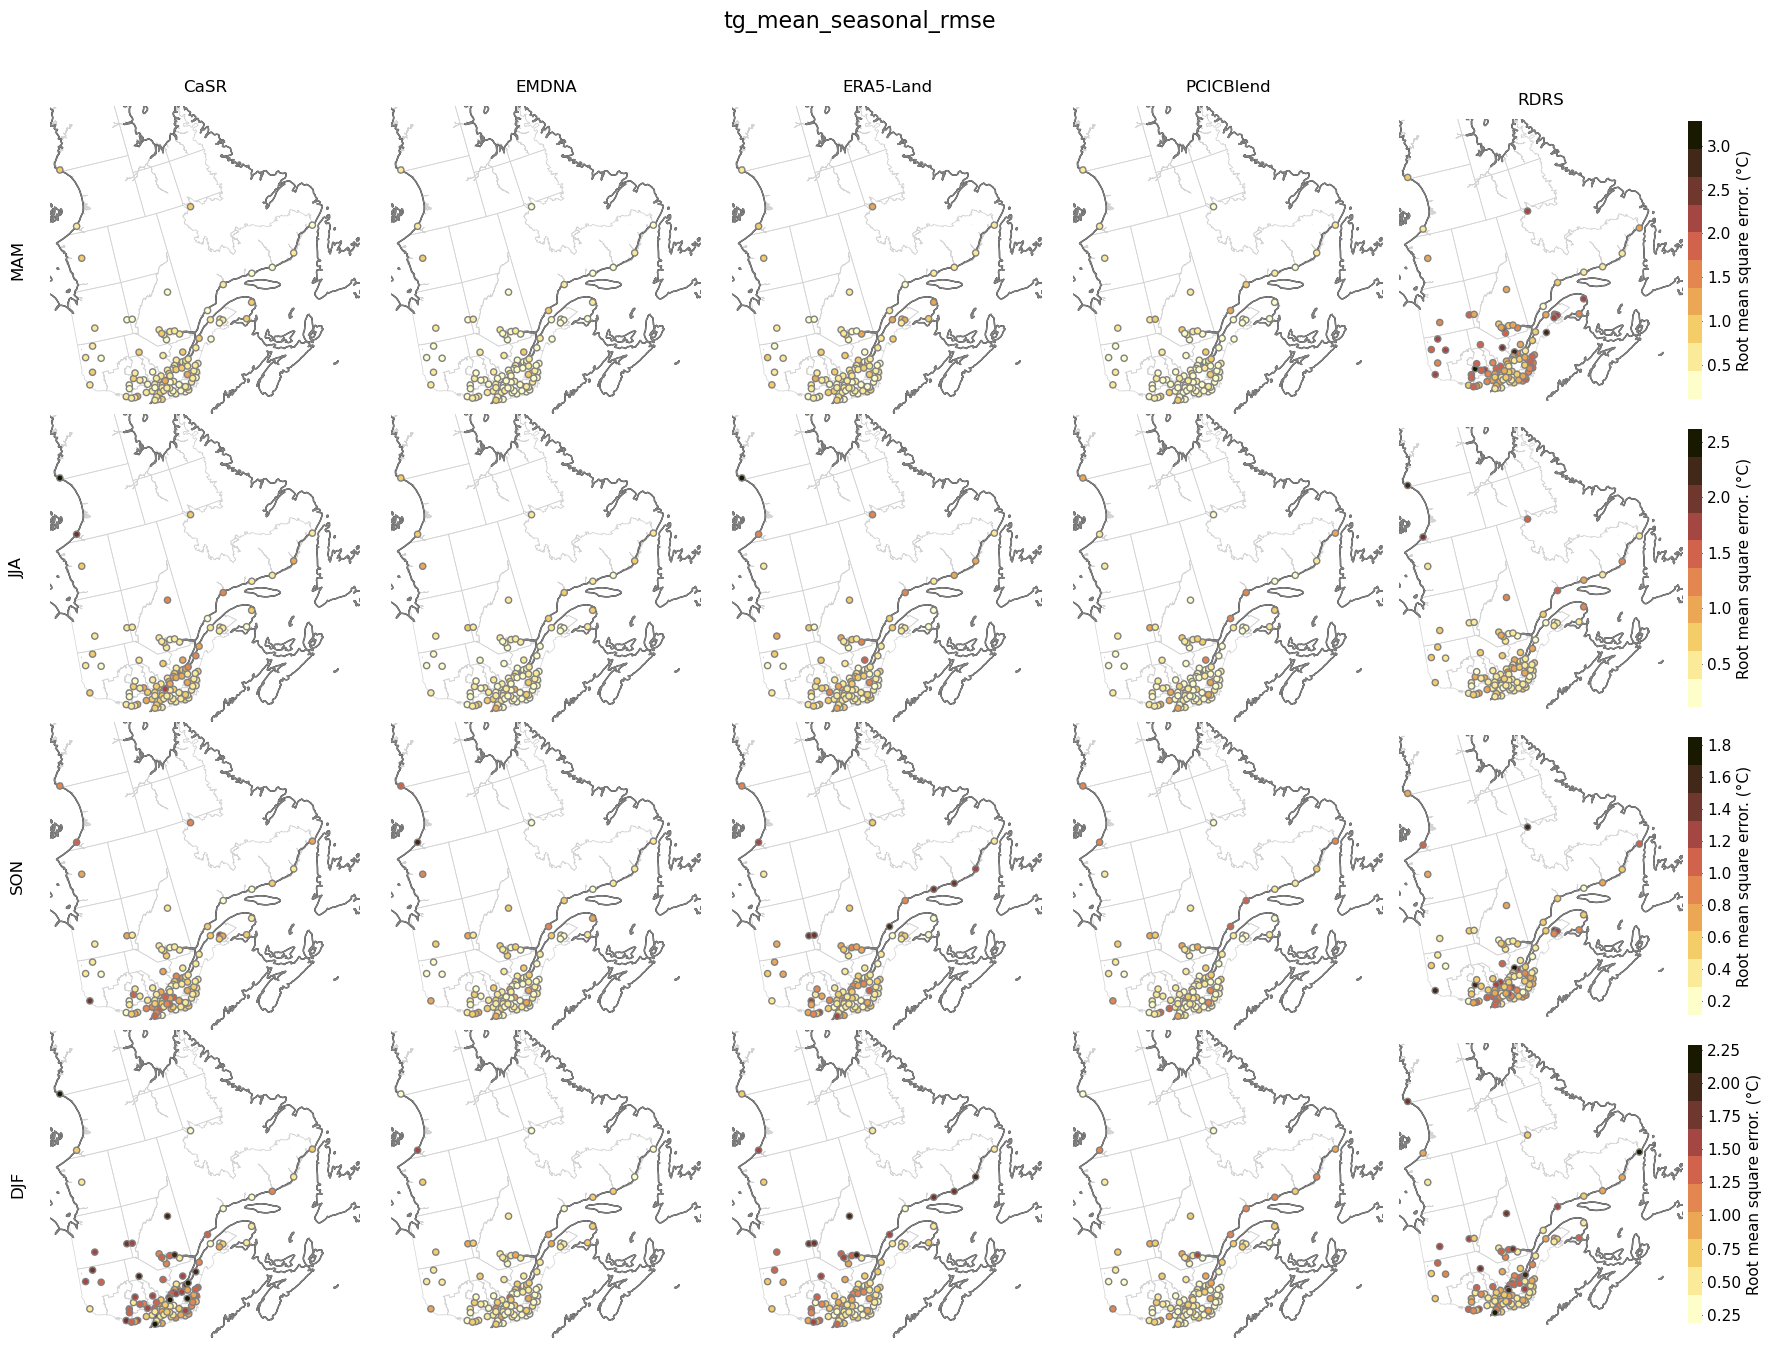

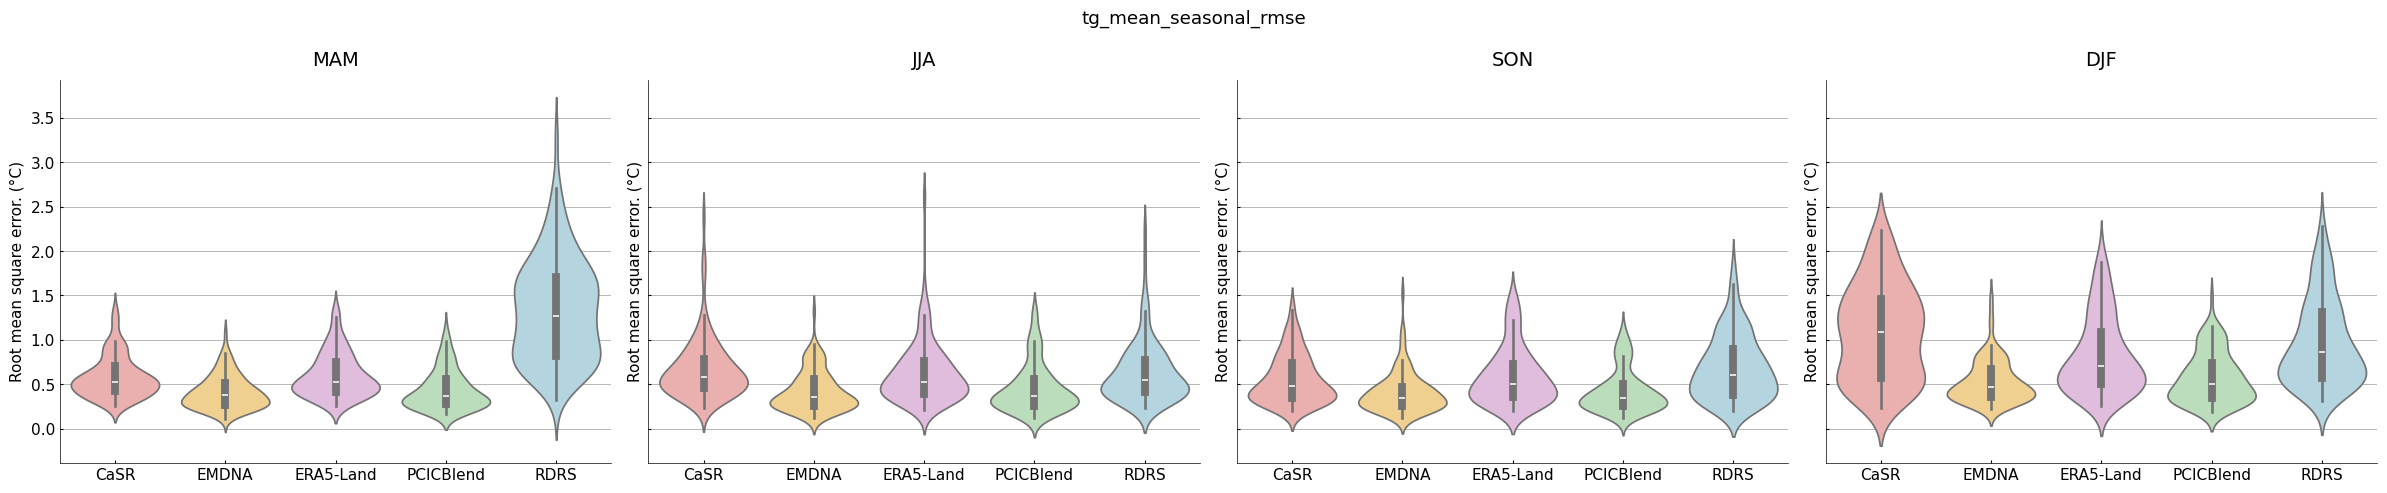

In [11]:
import sys

import numpy as np
import xscen as xs
import cartopy.crs as ccrs
from xscen.config import CONFIG
import figanos.matplotlib as fg

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from figanos.matplotlib.utils import create_cmap

fg.utils.set_mpl_style('ouranos')

# Load configuration
xs.load_config(
    "../paths_obs.yml", "../config_obs.yml", verbose=(__name__ == "__main__"), reset=True
)

import geopandas as gpd
from cartopy.io import shapereader
from cartopy.feature import ShapelyFeature

SOURCE_COLORS = {
    "EMDNA": "#FFD580",
    "PCICBlend": "#B6E2B6",
    "RDRS": "#ADD8E6",
    "ERA5-Land": "#E6B6E2",
    "CaSR": "#F4A6A6"
}

# Load region shapefile
gdf = gpd.read_file("../"+CONFIG["spatial_mean"]["region"]["shape"])
region_feature = ShapelyFeature(
    gdf.geometry,
    ccrs.PlateCarree(),
    edgecolor="lightgray",
    facecolor="none",
    linewidth=0.5,
    zorder=1  # Lower than scatter points
)

pcat = xs.ProjectCatalog(CONFIG["paths"]["project_catalog"])
pcat_df = pcat.df

# === MAIN LOOP ===
pcat_df_perf = pcat_df[pcat_df["processing_level"] == "performance"]
variable_groups = pcat_df_perf["variable"].unique()
variables = set(item for group in variable_groups for item in group)

cmap = create_cmap("prec")

for perf_var in variables:
    print(f"Processing variable: {perf_var}")

    dts_perf = pcat.search(processing_level="performance", variable=perf_var).to_dataset_dict()

    all_rec_ids = sorted(dts_perf.keys())
    n_models = len(all_rec_ids)

    # Determine if data is annual (no "season" dimension) and add fake season if needed
    for rec_id in all_rec_ids:
        ds = dts_perf[rec_id]
        if perf_var in ds:
            if "season" not in ds[perf_var].dims:
                print(f"\tDetected annual data for {rec_id}")
                dts_perf[rec_id][perf_var] = ds[perf_var].expand_dims(season=["Annual"])

    # Extract seasons from one dataset
    first_ds = dts_perf[all_rec_ids[0]]
    seasons = first_ds["season"].values
    n_seasons = len(seasons)

    import matplotlib.gridspec as gridspec

    fig = plt.figure(
        figsize=(4.2 * n_models + 1.0, 4.0 * n_seasons),
        constrained_layout=False
    )

    gs = gridspec.GridSpec(
        nrows=n_seasons,
        ncols=n_models,
        figure=fig,
        wspace=0.0,
        hspace=0.0
    )

    axs = np.empty((n_seasons, n_models), dtype=object)
    for i in range(n_seasons):
        for j in range(n_models):
            axs[i, j] = fig.add_subplot(gs[i, j], projection=ccrs.LambertConformal())

    for i, season in enumerate(seasons):
        # Compute vmin/vmax across all reconstructions for this season
        vmin = min(
            dts_perf[rid][perf_var].sel(season=season).min().values.item()
            for rid in all_rec_ids
        )
        vmax = max(
            dts_perf[rid][perf_var].sel(season=season).max().values.item()
            for rid in all_rec_ids
        )
        norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
        levels = np.linspace(vmin, vmax, 11)

        for j, rec_id in enumerate(all_rec_ids):
            ax = axs[i, j]
            ax.coastlines()
            ax.add_feature(region_feature)

            # Determine extent
            lat_vals = dts_perf[rec_id].lat.values
            lon_vals = dts_perf[rec_id].lon.values
            extent = [lon_vals.min(), lon_vals.max(), lat_vals.min(), lat_vals.max()]
            ax.set_extent(extent, crs=ccrs.PlateCarree())

            is_final_column = (j == n_models - 1)

            da = dts_perf[rec_id][perf_var].sel(season=season)
            
            nan_mask = np.isnan(da).compute()
            da = da.where(~nan_mask, drop=True)

            # Identify stations that are NaN only in DJF
            if season == "DJF" and perf_var=="pr_mean_seasonal_rmse":
                all_stations = dts_perf[rec_id]["station"].values
                nan_stations_djf = dts_perf[rec_id][perf_var].sel(season="DJF").isnull()
                
                # Compare with all other seasons
                nan_in_others = np.zeros_like(nan_stations_djf, dtype=bool)
                for other_season in seasons:
                    if other_season != "DJF":
                        nan_in_other = dts_perf[rec_id][perf_var].sel(season=other_season).isnull()
                        nan_in_others |= nan_in_other.values

                # Find stations NaN in DJF but not in others
                djf_only_nan = nan_stations_djf.values & ~nan_in_others
                if djf_only_nan.any():
                    bad_stations = all_stations[djf_only_nan]
                    print(f"\n Station(s) only NaN in DJF for '{rec_id}': {bad_stations}")


            fg.scattermap(
                da,#da.dropna(dim="station"),
                ax=ax,
                plot_kw={
                    "norm": norm,
                    "add_colorbar": is_final_column,
                    "cbar_kwargs": {"shrink": 0.9},
                    "zorder": 3,
                    "edgecolor": "grey",
                    "s": 20,
                    "linewidth": 0.1,
                },
                levels=levels,
                show_time=False,
                features={"coastline": {"edgecolor": "gray"}},
                frame=False
            )

            # Titles and annotations
            if i == 0:
                src = dts_perf[rec_id].attrs.get("cat:source", "")
                ax.set_title(f"{src}", fontsize=12)
            else:
                ax.set_title("")

            if j == 0:
                ax.annotate(
                    str(season),
                    xy=(-0.08, 0.5),
                    xycoords='axes fraction',
                    ha='right',
                    va='center',
                    fontsize=12,
                    rotation=90
                )

    # Adjust suptitle position dynamically
    suptitle_y = 0.94 if n_seasons > 1 else 1.1
    fig.suptitle(f"{perf_var}", fontsize=16, y=suptitle_y)

    ###### Violin plots ######
    import matplotlib.pyplot as plt

    # === Extract seasons from any dataset ===
    any_ds = next(iter(dts_perf.values()))
    seasons = any_ds.season.values
    n_seasons = len(seasons)

    # === Create a subplot with one column per season ===
    fig, axs = plt.subplots(1, n_seasons, figsize=(6 * n_seasons, 5), sharey=True)

    # Ensure axs is iterable
    if n_seasons == 1:
        axs = [axs]

    # === Loop over seasons ===
    for i, season in enumerate(seasons):
        violin_dict = {}
        color_list = []

        for id in all_rec_ids:  # Enforce same order as scattermaps
            ds = dts_perf[id]
            new_key = ds.attrs.get("cat:source", id)

            for var in ds.data_vars:
                da = ds[var].sel(season=season)
                violin_dict[new_key] = da
                color_list.append(SOURCE_COLORS.get(new_key, "#CCCCCC"))  # fallback color

        # === Plot violin plot in the corresponding column ===
        fg.violin(violin_dict, ax=axs[i], color=color_list)  # Just add color list
        axs[i].set_title(str(season))

    fig.suptitle(var)
    plt.tight_layout()
    plt.show()


In [9]:
dts_perf

{'RDRS_Quebec_GovCan_AHCCD_CAN_station-tas.Quebec.performance.fx': <xarray.Dataset> Size: 17kB
 Dimensions:                (station: 108, season: 4)
 Coordinates: (12/19)
     elev                   (station) float64 864B dask.array<chunksize=(108,), meta=np.ndarray>
     frommonth              (station) float64 864B dask.array<chunksize=(108,), meta=np.ndarray>
     fromyear               (station) float64 864B dask.array<chunksize=(108,), meta=np.ndarray>
     joined                 (station) object 864B dask.array<chunksize=(108,), meta=np.ndarray>
     lat                    (station) float64 864B dask.array<chunksize=(108,), meta=np.ndarray>
     lon                    (station) float64 864B dask.array<chunksize=(108,), meta=np.ndarray>
     ...                     ...
   * season                 (season) <U3 48B 'MAM' 'JJA' 'SON' 'DJF'
   * station                (station) object 864B '7011983' ... '7117823'
     station_name           (station) object 864B dask.array<chunksize=(